In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Dataset.csv to Dataset (3).csv


In [ ]:
data = pd.read_csv('Dataset.csv')
data.head()

,Review,Rating
0,The selection is very small. It gets packed fa...,0
1,Used app many times. Service deteriorated. Ord...,0
2,"Tried to order, I input the promo code & was a...",0
3,"I'm highly disappointed in this service, I alw...",0
4,I've had terrible experiences. They take forev...,0


In [ ]:
data.tail()

,Review,Rating
3120,Any idea when the service will be available in...,1
3121,Brilliant service,1
3122,Excellent service!,1
3123,Excellent service,1
3124,Excellent service.,1


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.7 MB 60 kB/s 
     |████████████████████████████████| 11.3 MB 46.4 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=83c1af0e0ab90c0db6abb0a8be6c06e5e94cb1483cc96633d5179b8ed8fa9bf6
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into

In [ ]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

import pyLDAvis
import pyLDAvis.gensim_models as pygen

# NLTK Stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

stop_words.extend(['make', 'want', 'seem', 'run', 'need', 'even', 'not', 'would', 'say', 'could', '_', 
                'be', 'know', 'go', 'get', 'do','get','far','also','way','app','usd','eur','jai','hind','jai_hind',
'done', 'try', 'many','from', 'subject', 're', 'edu','some', 'nice', 'thank','singh','mast','untuk','apne','nise','vgood',
'think', 'see', 'rather', 'lot', 'line', 'even', 'also', 'may', 'use','goog','nce','aap','thik','hai','setu','aarogya_setu','aarogya',
'take', 'come','recommend','recommended','paypal','paytm', 'let','ad','add'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = re.sub('[^a-zA-Z0-9]',' ',sent) # remove non english words
        sent = re.sub('\s+',' ',sent) # remove non english words
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = data.Review.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])
# [['from', 'irwin', 'arnstein', 'subject', 're', 'recommendation', 'on', 'duc', 'summary', 'whats', 'it', 'worth', 'distribution', 'usa', 'expires', 'sat', 'may', 'gmt', ...trucated...]]

[['the', 'selection', 'is', 'very', 'small', 'it', 'gets', 'packed', 'fairly', 'quickly', 'but', 'the', 'delivery', 'system', 'is', 'dismal', 'have', 'ordered', 'or', 'times', 'and', 'there', 'has', 'been', 'problem', 'most', 'times', 'today', 'whatched', 'the', 'driver', 'on', 'the', 'map', 'and', 'went', 'outside', 'to', 'meet', 'him', 'he', 'did', 'not', 'bother', 'to', 'ring', 'the', 'doorbell', 'my', 'order', 'was', 'returned', 'to', 'the', 'shop', 'and', 'cancelled', 'other', 'times', 'bags', 'have', 'been', 'left', 'outside', 'in', 'the', 'road', 'it', 'seems', 'that', 'the', 'drivers', 'do', 'not', 'have', 'air', 'time', 'to', 'let', 'us', 'know', 'that', 'they', 'are', 'at', 'the', 'gate', 'and', 'they', 'have', 'no', 'understanding', 'of', 'how', 'doorbell', 'works', 'am', 'not', 'impressed', 'at', 'all', 'communication', 'is', 'almost', 'impossible', 'the', 'chat', 'to', 'us', 'feature', 'does', 'not', 'work']]


In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [ ]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=1, step=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

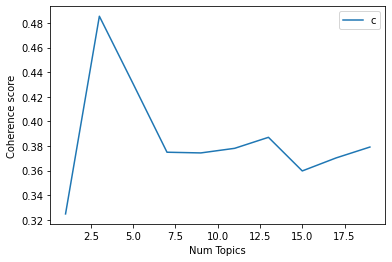

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=1, limit=20, step=2)
# Show graph
import matplotlib.pyplot as plt
limit=20; start=1; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)
                                           

pprint(lda_model.print_topics())

[(0,
  '0.069*"order" + 0.027*"time" + 0.025*"item" + 0.021*"delivery" + '
  '0.016*"checker" + 0.016*"deliver" + 0.015*"service" + 0.013*"stock" + '
  '0.012*"day" + 0.012*"receive"'),
 (1,
  '0.063*"service" + 0.038*"delivery" + 0.032*"time" + 0.032*"great" + '
  '0.026*"excellent" + 0.023*"love" + 0.022*"driver" + 0.019*"good" + '
  '0.019*"easy" + 0.018*"well"'),
 (2,
  '0.031*"item" + 0.030*"product" + 0.024*"available" + 0.021*"shopping" + '
  '0.016*"work" + 0.016*"option" + 0.014*"store" + 0.014*"alternative" + '
  '0.013*"update" + 0.012*"stock"')]


In [ ]:
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (roc_curve,roc_auc_score,confusion_matrix,accuracy_score,f1_score,precision_recall_curve)
import theano 
import pymc3 as pm
from pymc3.variational.callbacks import CheckParametersConvergence
import statsmodels.formula.api as smf

import arviz as az
import seaborn as sns
import pickle



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
total = len(data)
plt.figure(figsize=(10,5))
g = sns.countplot(x='Review', data=data)
g.set_ylabel('Rating', fontsize=12)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+get_width()/2.,
           height +1.5,
           '{:1.2f}%'.format(height/total*100),
           ha='center', fontsize=14, fontweight='bold')
plt.margins(y=0.1)
plt.show()

NameError: ignored

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9200 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128176 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128078 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128580 missing from current font.
  font.se

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f3ae5812f80> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f3ae468edd0> (for post_execute):


KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


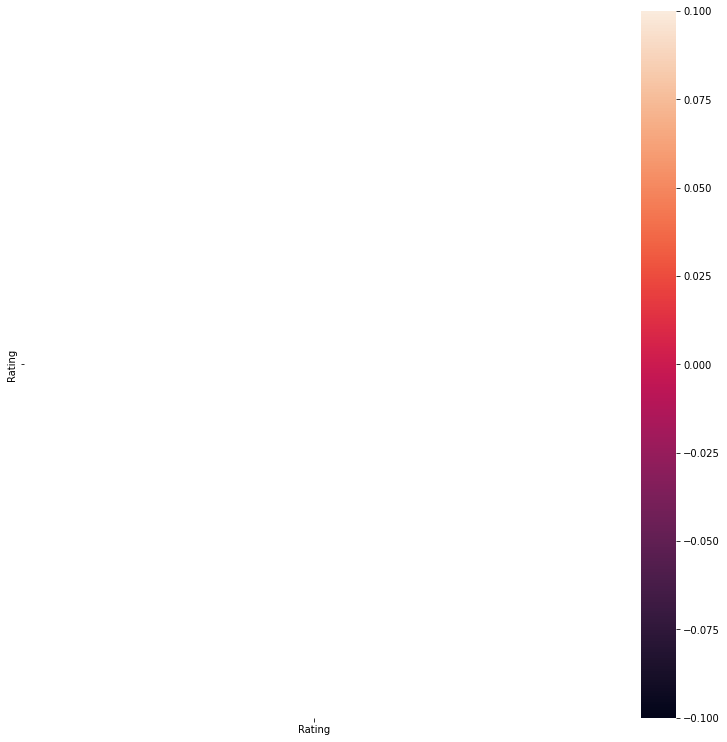

In [ ]:
plt.figure(figsize=(13, 13))
corr = data.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [ ]:
with pm.Model() as logistic_model:

    inter = pm.Normal('intercept', 0, sd=50)
    beta_1 = pm.Normal('beta_1', 0, sd=50)
    

    likelihood = pm.invlogit(inter+beta_1* data.Review)
    pm.Bernoulli(name = 'logit', p=likelihood, observed= data.Rating)

2021-11-06 11:11:55,814 : DEBUG : Attempting to acquire lock 139986226953616 on /root/.theano/compiledir_Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.7.12-64/.lock
2021-11-06 11:11:55,816 : DEBUG : Lock 139986226953616 acquired on /root/.theano/compiledir_Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.7.12-64/.lock
2021-11-06 11:11:56,665 : DEBUG : Attempting to release lock 139986226953616 on /root/.theano/compiledir_Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.7.12-64/.lock
2021-11-06 11:11:56,667 : DEBUG : Lock 139986226953616 released on /root/.theano/compiledir_Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.7.12-64/.lock
2021-11-06 11:11:56,675 : DEBUG : Attempting to acquire lock 139987687278800 on /root/.theano/compiledir_Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.7.12-64/.lock
2021-11-06 11:11:56,678 : DEBUG : Lock 139987687278800 acquired on /root/.theano/compiledir_Linux-5.4.104+-x86_64-with-Ubuntu-18.04-bionic-x86_64-3.7.1

AttributeError: ignored

In [ ]:
data.isna().mean()



Review    0.0
Rating    0.0
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


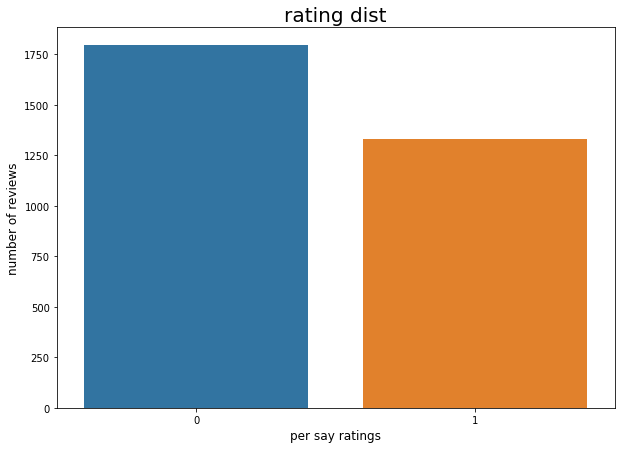

In [ ]:
ratings_count = data['Rating'].value_counts()
ratings_count = ratings_count.sort_index()

fig = plt.figure(figsize=(10,7))
ax = sns.barplot(ratings_count.index, ratings_count.values)
plt.title('rating dist', fontsize=20)
plt.ylabel('number of reviews', fontsize=12)
plt.xlabel('per say ratings', fontsize=12);

In [ ]:
data = data[data.Rating !=1]

pd.set_option('mode.chained_assignment', None)
data['labels'] = data['Rating'].apply(lambda x:1 if x<1 else 0)
data = data.drop('Rating', axis=1)

In [ ]:
data

,Review,Rating
0,The selection is very small. It gets packed fa...,0
1,Used app many times. Service deteriorated. Ord...,0
2,"Tried to order, I input the promo code & was a...",0
3,"I'm highly disappointed in this service, I alw...",0
4,I've had terrible experiences. They take forev...,0
...,...,...
3120,Any idea when the service will be available in...,1
3121,Brilliant service,1
3122,Excellent service!,1
3123,Excellent service,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


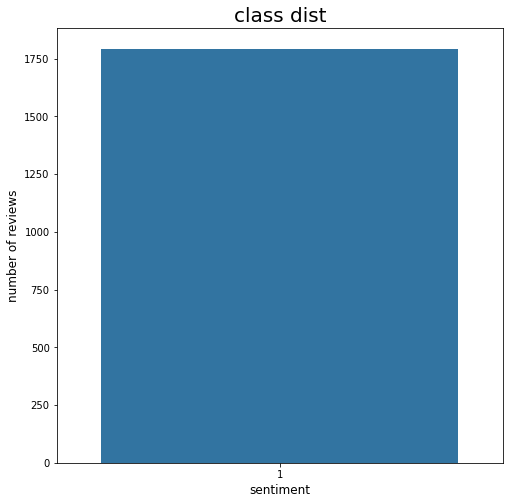

In [ ]:
label_count = data['labels'].value_counts()
label_count = label_count.sort_index()
fig = plt.figure(figsize=(8,8))
ax = sns.barplot(label_count.index, label_count.values)
plt.title('class dist',fontsize=20)
plt.ylabel('number of reviews',fontsize=12)
plt.xlabel('sentiment',fontsize=12);

In [ ]:
print('{:.2f}'.format(data[data.Rating==0].shape[0]/data.shape[0]))

0.57


In [ ]:
train,test = train_test_split(data, test_size=0.2, stratify =data['Rating'],
                              random_state=123)

In [ ]:
import string
punct = set(string.punctuation)

In [ ]:
def text_prep(text):
    #clean text
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)

    text = re.sub('[^a-z\s]', '', text.lower())
    
    #remove punctuation        
    punc_removed = [char for char in text if char not in punct]
    punc_removed = ''.join(punc_removed)
    
    return [word for word in punc_removed.split()]
    

In [ ]:
import time,re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from nltk.stem import PorterStemmer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
start_time = time.time()
cv= CountVectorizer(binary=True, analyzer = text_prep, min_df = 10, max_df = 0.95)
cv.fit_transform(train['Review'].values)
train_feature_set=cv.transform(train['Review'].values)
test_feature_set=cv.transform(test['Review'].values)
print("Time takes to convert text input into feature vector: ", round((time.time() - start_time)/60, 2), " mins")

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Time takes to convert text input into feature vector:  0.01  mins


In [ ]:
train_feature_set.shape[1]

978

In [ ]:
y_train = train['Rating'].values
y_test = test['Rating'].values

In [ ]:
start_time = time.time()
lr = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter=1000)
lr.fit(train_feature_set,y_train)
y_pred = lr.predict(test_feature_set)
print("Time takes to train model and make predictions: ", round((time.time() - start_time)/60, 2), " mins")

Time takes to train model and make predictions:  0.0  mins


In [ ]:
print('Accuracy:', round(metrics.accuracy_score(y_test,y_pred),2))



Accuracy: 0.51
